In [1]:
from __future__ import division
from __future__ import print_function

import time
import numpy as np

import torch
import torch.nn.functional as F
import torch.optim as optim

from utils import load_data, test, run_experiment
from models import GCN_2, GCN_3, ite_GCN

In [2]:
adj, features, labels, idx_train, idx_val, idx_test = load_data(path="../data/cora/", dataset="cora")

Loading cora dataset...


In [3]:
hidden = 16
dropout = 0.5
lr = 0.01
weight_decay = 5e-4
num_epochs = 200
smooth_fac = 0.2

In [4]:
model0 = GCN_2(nfeat=features.shape[1],
            nhid=hidden,
            nclass=labels.max().item() + 1,
            dropout=dropout
)
run_experiment(num_epochs=num_epochs, model=model0, lr=lr, weight_decay=weight_decay, features=features, adj=adj, idx_train=idx_train, idx_val=idx_val, idx_test=idx_test, labels=labels)


Intialize a 2-layer GCN
runrunrun!
Epoch: 0001 loss_train: 1.9401 acc_train: 0.2929 loss_val: 1.8827 acc_val: 0.3500 time: 0.0368s
Epoch: 0002 loss_train: 1.9392 acc_train: 0.2929 loss_val: 1.8724 acc_val: 0.3500 time: 0.0091s
Epoch: 0003 loss_train: 1.9234 acc_train: 0.2929 loss_val: 1.8629 acc_val: 0.3500 time: 0.0955s
Epoch: 0004 loss_train: 1.9037 acc_train: 0.2929 loss_val: 1.8538 acc_val: 0.3500 time: 0.0522s
Epoch: 0005 loss_train: 1.8951 acc_train: 0.2929 loss_val: 1.8448 acc_val: 0.3500 time: 0.0102s
Epoch: 0006 loss_train: 1.8883 acc_train: 0.2929 loss_val: 1.8359 acc_val: 0.3500 time: 0.0072s
Epoch: 0007 loss_train: 1.8829 acc_train: 0.2929 loss_val: 1.8273 acc_val: 0.3500 time: 0.0105s
Epoch: 0008 loss_train: 1.8690 acc_train: 0.2929 loss_val: 1.8184 acc_val: 0.3500 time: 0.0083s
Epoch: 0009 loss_train: 1.8525 acc_train: 0.2929 loss_val: 1.8095 acc_val: 0.3500 time: 0.0129s
Epoch: 0010 loss_train: 1.8457 acc_train: 0.2929 loss_val: 1.8007 acc_val: 0.3500 time: 0.0088s
Epoch

In [5]:
model1 = GCN_3(nfeat=features.shape[1],
            nhid=hidden,
            nclass=labels.max().item() + 1,
            dropout=dropout)
run_experiment(num_epochs=num_epochs, model=model1, lr=lr, weight_decay=weight_decay, features=features, adj=adj, idx_train=idx_train, idx_val=idx_val, idx_test=idx_test, labels=labels)


Intialize a 3-layer GCN
runrunrun!
Epoch: 0001 loss_train: 2.0512 acc_train: 0.0786 loss_val: 2.0238 acc_val: 0.0667 time: 0.0373s
Epoch: 0002 loss_train: 1.9994 acc_train: 0.1143 loss_val: 1.9839 acc_val: 0.1633 time: 0.0115s
Epoch: 0003 loss_train: 1.9753 acc_train: 0.1714 loss_val: 1.9466 acc_val: 0.1567 time: 0.0130s
Epoch: 0004 loss_train: 1.9358 acc_train: 0.1643 loss_val: 1.9125 acc_val: 0.1567 time: 0.0115s
Epoch: 0005 loss_train: 1.9191 acc_train: 0.1714 loss_val: 1.8814 acc_val: 0.1567 time: 0.0118s
Epoch: 0006 loss_train: 1.8926 acc_train: 0.2429 loss_val: 1.8537 acc_val: 0.3500 time: 0.0111s
Epoch: 0007 loss_train: 1.8555 acc_train: 0.3429 loss_val: 1.8295 acc_val: 0.3500 time: 0.0119s
Epoch: 0008 loss_train: 1.8377 acc_train: 0.3071 loss_val: 1.8089 acc_val: 0.3500 time: 0.0122s
Epoch: 0009 loss_train: 1.8159 acc_train: 0.3000 loss_val: 1.7926 acc_val: 0.3500 time: 0.0171s
Epoch: 0010 loss_train: 1.7992 acc_train: 0.3000 loss_val: 1.7805 acc_val: 0.3500 time: 0.0190s
Epoch

In [6]:
model2 = ite_GCN(nfeat=features.shape[1],
            nclass=labels.max().item() + 1,
            dropout=dropout,
            train_nite= 2,
            eval_nite= 0,
            allow_grad=True,
            smooth_fac=smooth_fac)
run_experiment(num_epochs=num_epochs, model=model2, lr=lr, weight_decay=weight_decay, features=features, adj=adj, idx_train=idx_train, idx_val=idx_val, idx_test=idx_test, labels=labels)

Unspecified or invalid number of iterations for inference. Treat as the same as training iterations.
Initialize a 1-layer GCN with  2 training iterations and  2  inference iterations.
Gradient flows to all iterations:  True
runrunrun!
Epoch: 0001 loss_train: 1.9461 acc_train: 0.1357 loss_val: 1.8150 acc_val: 0.3500 time: 0.4106s
Epoch: 0002 loss_train: 1.8248 acc_train: 0.2929 loss_val: 1.9617 acc_val: 0.3500 time: 0.4037s
Epoch: 0003 loss_train: 1.9917 acc_train: 0.2929 loss_val: 1.8005 acc_val: 0.3500 time: 0.3932s
Epoch: 0004 loss_train: 1.7918 acc_train: 0.2929 loss_val: 1.8510 acc_val: 0.1567 time: 0.4099s
Epoch: 0005 loss_train: 1.8328 acc_train: 0.2143 loss_val: 1.8293 acc_val: 0.1567 time: 0.5112s
Epoch: 0006 loss_train: 1.8001 acc_train: 0.2357 loss_val: 1.7753 acc_val: 0.1567 time: 0.4334s
Epoch: 0007 loss_train: 1.7361 acc_train: 0.2000 loss_val: 1.7028 acc_val: 0.1533 time: 0.4188s
Epoch: 0008 loss_train: 1.6476 acc_train: 0.2143 loss_val: 1.5906 acc_val: 0.3500 time: 0.399

In [7]:
model3 = ite_GCN(nfeat=features.shape[1],
            nclass=labels.max().item() + 1,
            dropout=dropout,
            train_nite= 3,
            eval_nite= 0,
            allow_grad=True,
            smooth_fac=smooth_fac)
run_experiment(num_epochs=num_epochs, model=model3, lr=lr, weight_decay=weight_decay, features=features, adj=adj, idx_train=idx_train, idx_val=idx_val, idx_test=idx_test, labels=labels)

Unspecified or invalid number of iterations for inference. Treat as the same as training iterations.
Initialize a 1-layer GCN with  3 training iterations and  3  inference iterations.
Gradient flows to all iterations:  True
runrunrun!
Epoch: 0001 loss_train: 1.9454 acc_train: 0.1714 loss_val: 1.9325 acc_val: 0.3500 time: 0.9158s
Epoch: 0002 loss_train: 1.9769 acc_train: 0.2929 loss_val: 1.9502 acc_val: 0.1267 time: 0.8317s
Epoch: 0003 loss_train: 1.9491 acc_train: 0.1500 loss_val: 1.9385 acc_val: 0.1267 time: 0.9137s
Epoch: 0004 loss_train: 1.9378 acc_train: 0.1714 loss_val: 1.9357 acc_val: 0.1267 time: 0.9478s
Epoch: 0005 loss_train: 1.9355 acc_train: 0.1357 loss_val: 1.9212 acc_val: 0.3367 time: 0.8796s
Epoch: 0006 loss_train: 1.9201 acc_train: 0.2500 loss_val: 1.8802 acc_val: 0.3500 time: 0.7953s
Epoch: 0007 loss_train: 1.8789 acc_train: 0.2929 loss_val: 1.8167 acc_val: 0.3500 time: 0.6744s
Epoch: 0008 loss_train: 1.8109 acc_train: 0.2857 loss_val: 1.8460 acc_val: 0.3500 time: 0.670

In [8]:
test_losses = []
test_accuracies = []

for i in range(1, 30):
    model = ite_GCN(nfeat=features.shape[1],
            nclass=labels.max().item() + 1,
            dropout=dropout,
            train_nite= 2,
            eval_nite= i,
            allow_grad=True,
            smooth_fac=smooth_fac)
    model.load_state_dict(model2.state_dict().copy())
    loss_test, acc_test = test(model, features, adj, idx_test, labels)
    test_losses.append(loss_test.item())
    test_accuracies.append(acc_test.item())


Initialize a 1-layer GCN with  2 training iterations and  1  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 1.5056 accuracy= 0.5840
inference time:  0.054453134536743164
Initialize a 1-layer GCN with  2 training iterations and  2  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 0.7670 accuracy= 0.7730
inference time:  0.10773611068725586
Initialize a 1-layer GCN with  2 training iterations and  3  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 3.7696 accuracy= 0.7200
inference time:  0.17611908912658691
Initialize a 1-layer GCN with  2 training iterations and  4  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 54.5576 accuracy= 0.3610
inference time:  0.332103967666626
Initialize a 1-layer GCN with  2 training iterations and  5  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 561.2214 accuracy= 0.

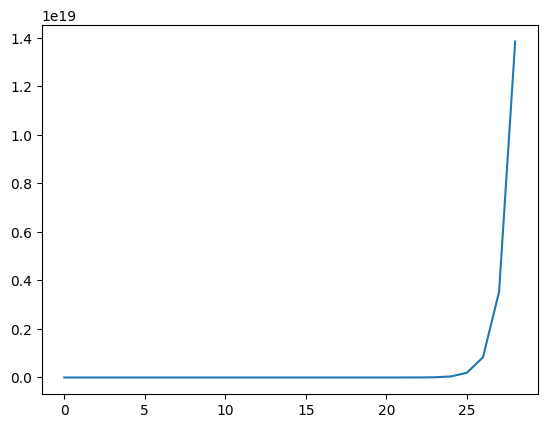

In [9]:
import matplotlib.pyplot as plt
plt.plot(test_losses)

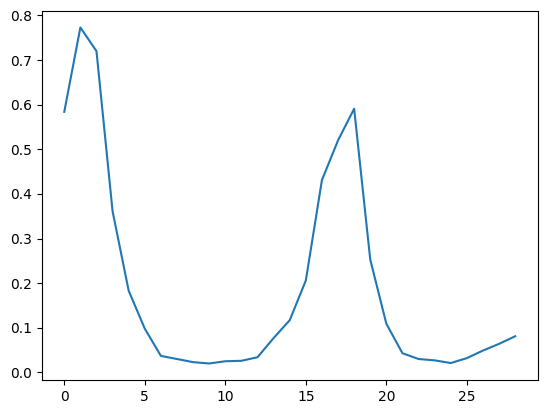

In [10]:
plt.plot(test_accuracies)

In [11]:
test_losses = []
test_accuracies = []

for i in range(1, 30):
    model = ite_GCN(nfeat=features.shape[1],
            nclass=labels.max().item() + 1,
            dropout=0,
            train_nite= 3,
            eval_nite= i,
            allow_grad=True,
            smooth_fac=smooth_fac)
    model.load_state_dict(model3.state_dict().copy())
    loss_test, acc_test = test(model, features, adj, idx_test, labels)
    test_losses.append(loss_test.item())
    test_accuracies.append(acc_test.item())


Initialize a 1-layer GCN with  3 training iterations and  1  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 1.8270 accuracy= 0.4250
inference time:  0.14443421363830566
Initialize a 1-layer GCN with  3 training iterations and  2  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 2.3055 accuracy= 0.1850
inference time:  0.12040019035339355
Initialize a 1-layer GCN with  3 training iterations and  3  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 1.2627 accuracy= 0.7180
inference time:  0.16978192329406738
Initialize a 1-layer GCN with  3 training iterations and  4  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 29.6779 accuracy= 0.2510
inference time:  0.3224630355834961
Initialize a 1-layer GCN with  3 training iterations and  5  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 26.1265 accuracy= 0.6

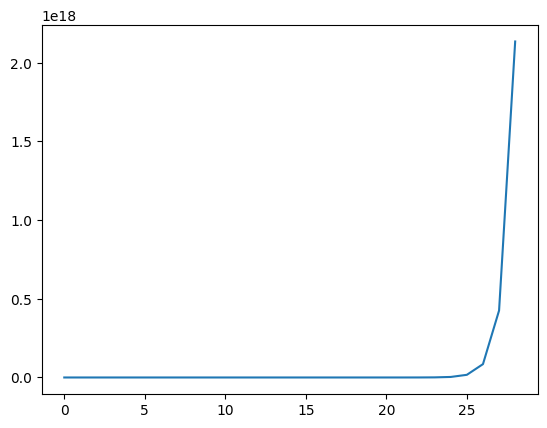

In [12]:
plt.plot(test_losses)

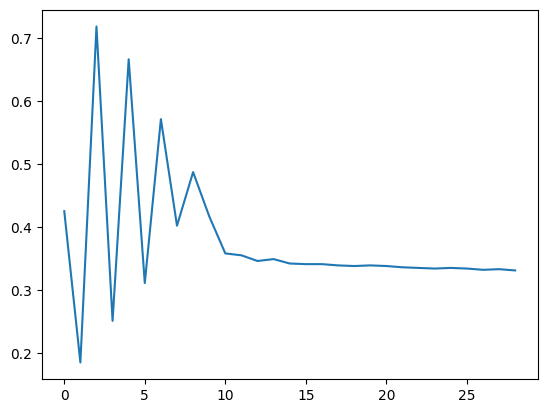

In [13]:
plt.plot(test_accuracies)